In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the two new datasets provided by the user
file_female_path = '/content/API_SP.POP.TOTL.FE.ZS_DS2_en_csv_v2_2296.csv'
file_male_path = '/content/API_SP.POP.TOTL.MA.ZS_DS2_en_csv_v2_2729.csv'

# Read both datasets into pandas dataframes
female_data = pd.read_csv(file_female_path, skiprows=4, on_bad_lines='skip')
male_data = pd.read_csv(file_male_path, skiprows=4, on_bad_lines='skip')

# Check the structure of both datasets to ensure they are loaded correctly
female_data.head(), male_data.head()

(                  Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                Indicator Name     Indicator Code       1960  \
 0  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.858849   
 1  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.387880   
 2  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  48.083054   
 3  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.179683   
 4  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  49.843790   
 
         1961       1962       1963       1964       1965  ...       2015  \
 0  50.850191  50.845065  50.836016  50.826773  50.823381  ...  52.589275   
 1  50.388814  50.391276  50.395656  50.400512  50.405510  ...  50.531940 

# Visualizing the distribution of gender (continuous variable)

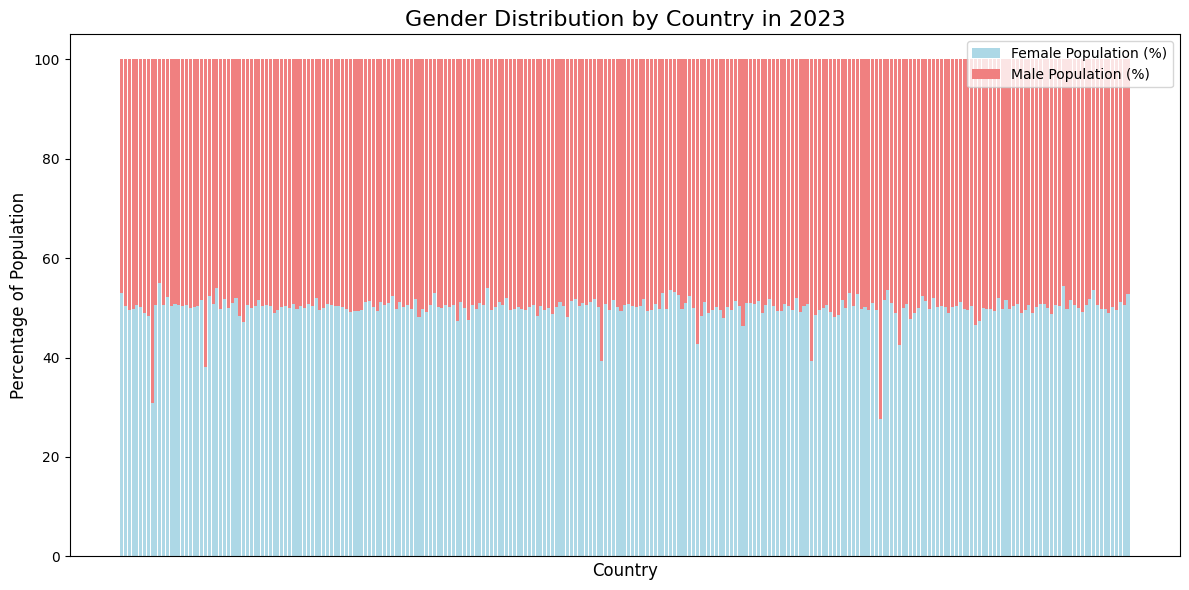

In [26]:
# Filter the data for the year 2023 for both male and female populations
female_2023 = female_data[['Country Name', '2023']].dropna()
male_2023 = male_data[['Country Name', '2023']].dropna()

# Rename the columns for clarity
female_2023.columns = ['Country Name', 'Female Population (%)']
male_2023.columns = ['Country Name', 'Male Population (%)']

# Merge the two datasets on the 'Country Name' to align the male and female data
gender_distribution_2023 = pd.merge(female_2023, male_2023, on='Country Name')

# Plotting the distribution of male and female population percentages
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart to display both male and female percentages
ax.bar(gender_distribution_2023['Country Name'], gender_distribution_2023['Female Population (%)'], label='Female Population (%)', color='lightblue')
ax.bar(gender_distribution_2023['Country Name'], gender_distribution_2023['Male Population (%)'], bottom=gender_distribution_2023['Female Population (%)'], label='Male Population (%)', color='lightcoral')

# Add labels and title
ax.set_title('Gender Distribution by Country in 2023', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage of Population', fontsize=12)
ax.set_xticks([])  # Hide x-axis ticks due to too many countries
ax.legend()

plt.tight_layout()
plt.show()

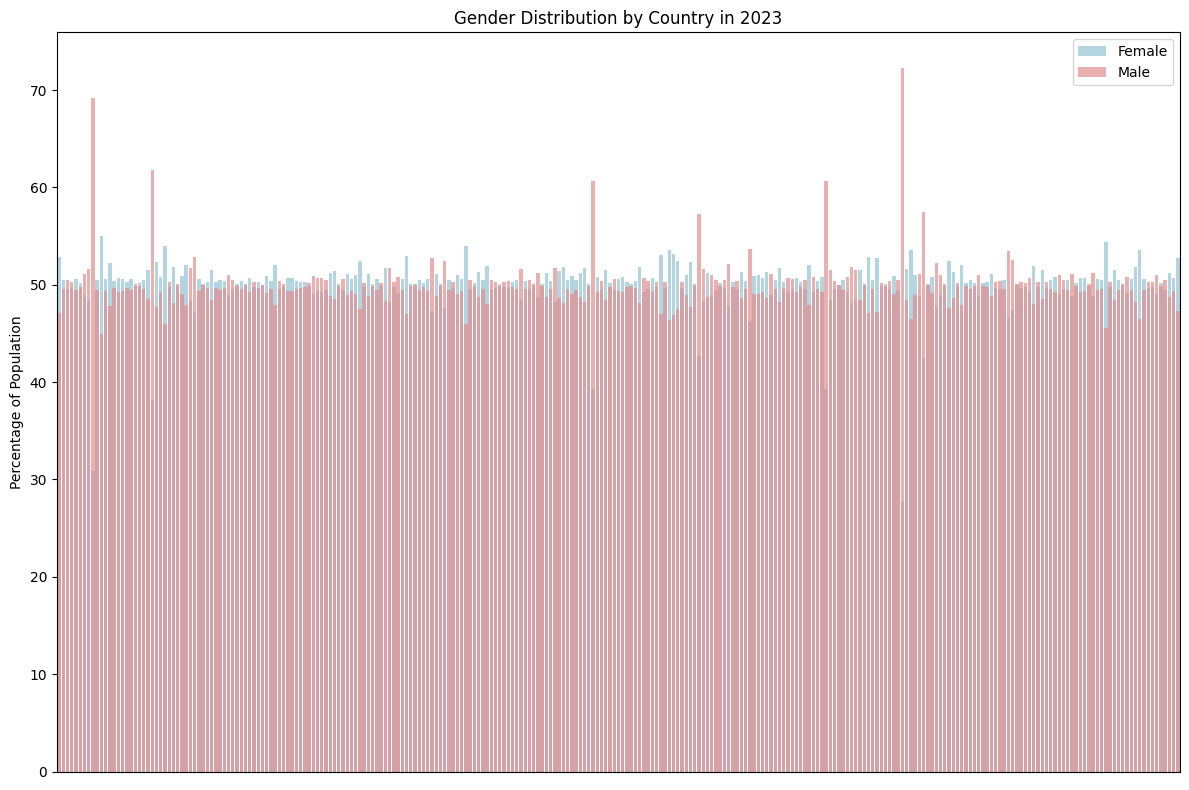

In [27]:
# Setting up different plot (for better visualization)
plt.figure(figsize = (12, 8))

# Create a bar chart for gender distribution
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = gender_distribution_2023, color = 'lightblue', label = 'Female')
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = gender_distribution_2023, color = 'lightcoral', label = 'Male', alpha = 0.7)

# Customize the plot
plt.xticks(rotation = 90)  # Rotate country names for better readability
plt.xlabel('Country')
plt.ylabel('Percentage of Population')
plt.title('Gender Distribution by Country in 2023')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis ticks due to too many countries
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Visualizing the distribution of gender using bar charts (categorical variable)

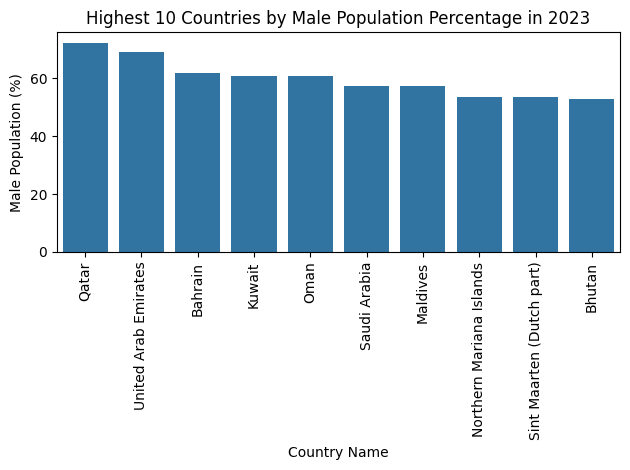

In [28]:
# Select only the top 10 countries by male population (2023) percentage
top_male_countries = gender_distribution_2023.nlargest(10, 'Male Population (%)')

# Plot only these top countries
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = top_male_countries)
plt.xticks(rotation = 90)
plt.title('Highest 10 Countries by Male Population Percentage in 2023')
plt.tight_layout() # For a better fit
plt.show()

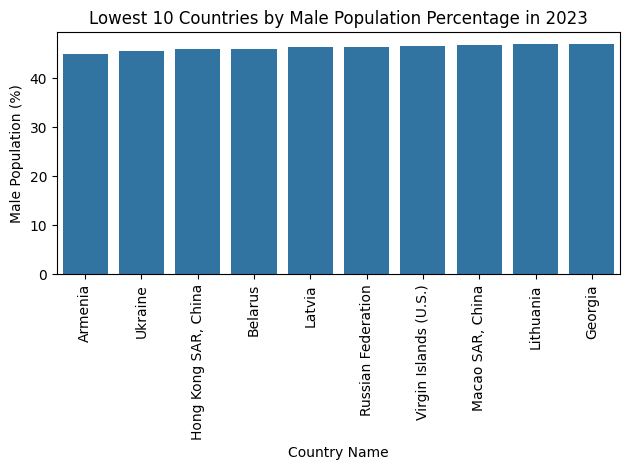

In [29]:
# Select only the lowest 10 countries by male population (2023) percentage
lowest_male_countries = gender_distribution_2023.nsmallest(10, 'Male Population (%)')

# Plot only these lowest countries
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = lowest_male_countries)
plt.xticks(rotation = 90)  # Rotate country labels for better readability
plt.title('Lowest 10 Countries by Male Population Percentage in 2023')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

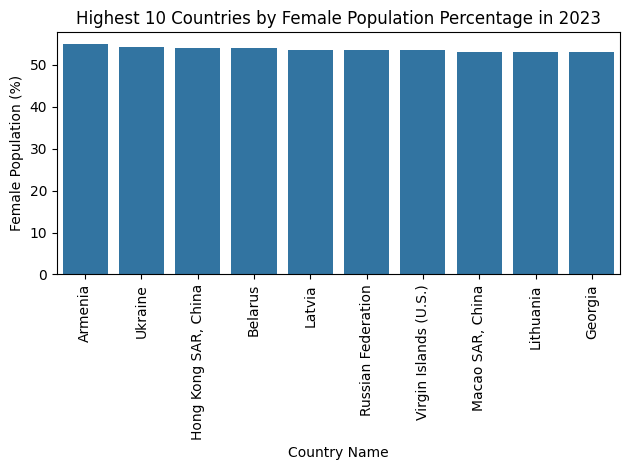

In [30]:
# Select only the top 10 countries by female population (2023) percentage
top_female_countries = gender_distribution_2023.nlargest(10, 'Female Population (%)')

# Plot only these top countries
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = top_female_countries)
plt.xticks(rotation = 90)
plt.title('Highest 10 Countries by Female Population Percentage in 2023')
plt.tight_layout() # For a better fit
plt.show()

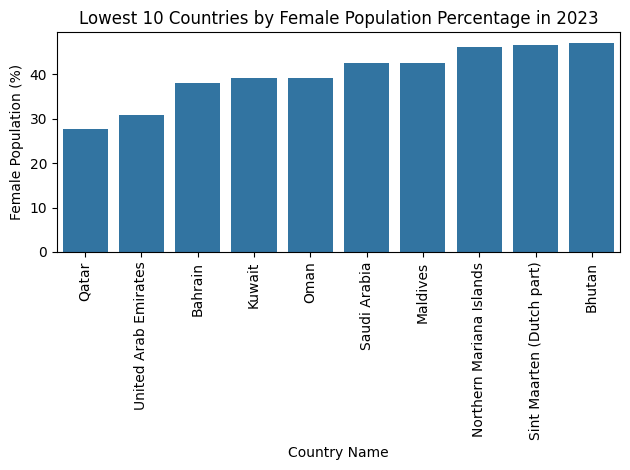

In [31]:
# Select only the lowest 10 countries by female population (2023) percentage
lowest_female_countries = gender_distribution_2023.nsmallest(10, 'Female Population (%)')

# Plot only these lowest countries
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = lowest_female_countries)
plt.xticks(rotation = 90)  # Rotate country labels for better readability
plt.title('Lowest 10 Countries by Female Population Percentage in 2023')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

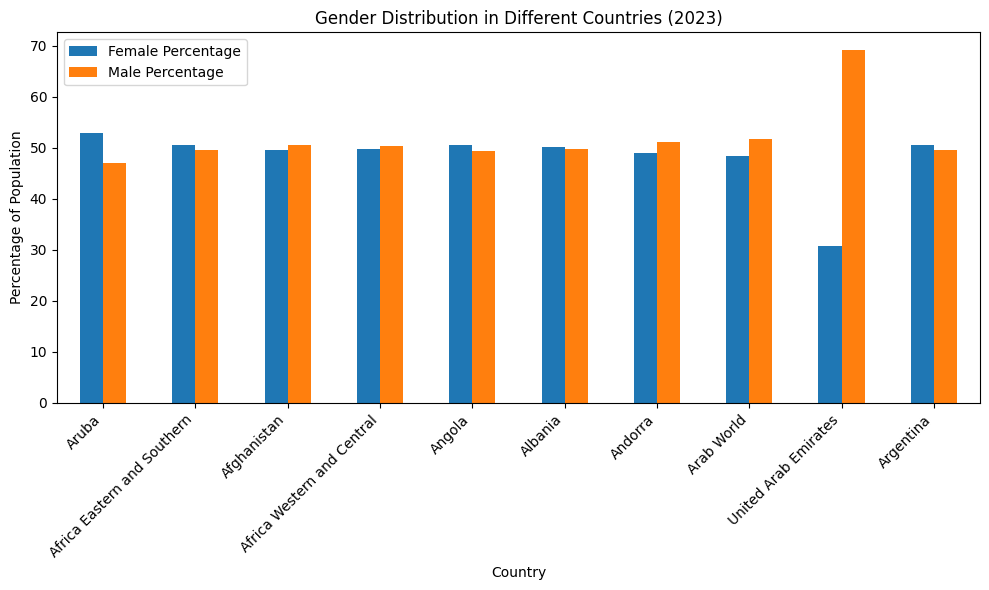

In [32]:
# Visualizing gender distribution using bar charts (for the first 10 countries)

# Creating the dataset to visualize
top10_data = pd.DataFrame({
    'Country': female_2023['Country Name'].head(10),
    'Female Percentage': female_2023['Female Population (%)'].head(10),
    'Male Percentage': male_2023['Male Population (%)'].head(10)
})

# Create a bar chart for gender distribution in selected countries
top10_data.set_index('Country', inplace = True)
top10_data.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Gender Distribution in Different Countries (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

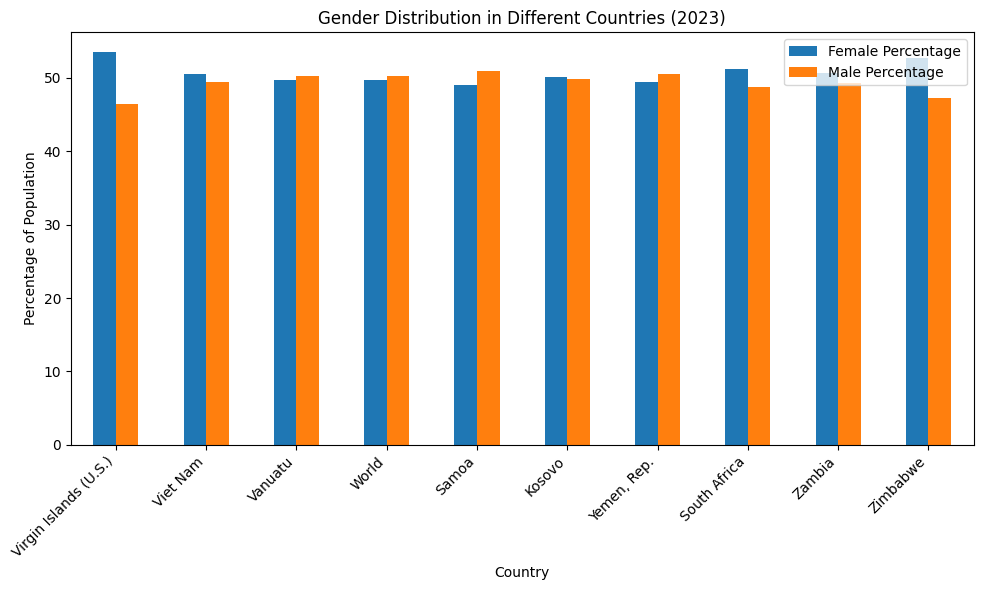

In [33]:
# Visualizing gender distribution using bar charts (for the last 10 countries)

# Creating the dataset to visualize
last10_data = pd.DataFrame({
    'Country': female_2023['Country Name'].tail(10),
    'Female Percentage': female_2023['Female Population (%)'].tail(10),
    'Male Percentage': male_2023['Male Population (%)'].tail(10)
})

# Create a bar chart for gender distribution in selected countries
last10_data.set_index('Country', inplace = True)
last10_data.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Gender Distribution in Different Countries (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

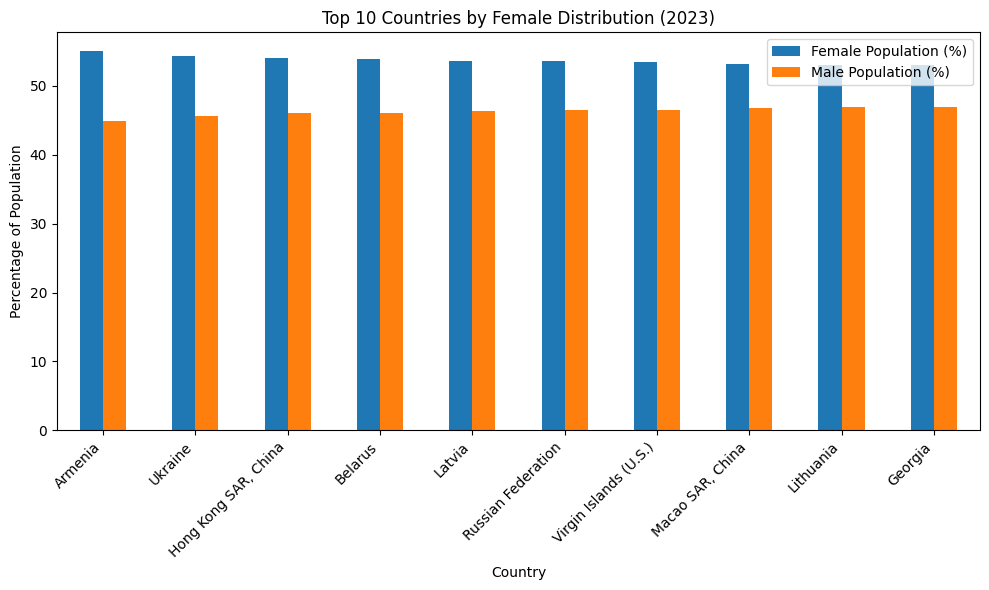

In [34]:
# Creating bar chart for top 10 countries by female distribution

# Sorting the dataset by Female Percentage to get the top 10 countries with the highest female population percentage
top_10_female_distribution = female_2023.sort_values(by = 'Female Population (%)', ascending = False).head(10)

# Matching the Male Percentage for the same top 10 countries
top_10_female_distribution = top_10_female_distribution.merge(male_2023, on = 'Country Name')

# Create a bar chart for the top 10 female distribution countries alongside male
top_10_female_distribution.set_index('Country Name', inplace = True)
top_10_female_distribution.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Top 10 Countries by Female Distribution (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


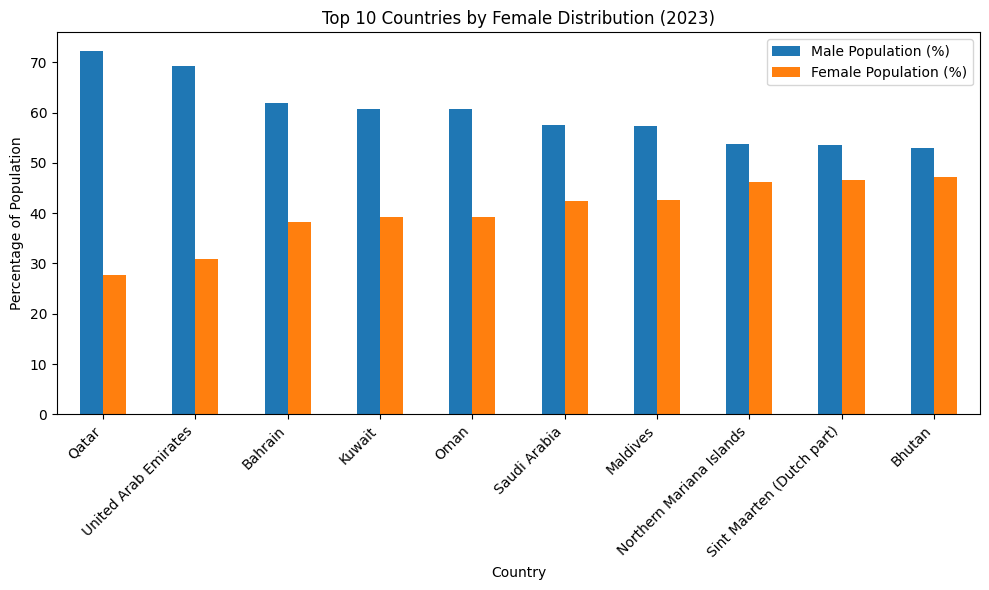

In [35]:
# Creating bar chart for top 10 countries by male distribution

# Sorting the dataset by Male Percentage to get the top 10 countries with the highest male population percentage
top_10_male_distribution = male_2023.sort_values(by = 'Male Population (%)', ascending = False).head(10)

# Matching the Male Percentage for the same top 10 countries
top_10_male_distribution = top_10_male_distribution.merge(female_2023, on = 'Country Name')

# Create a bar chart for the top 10 female distribution countries alongside male
top_10_male_distribution.set_index('Country Name', inplace = True)
top_10_male_distribution.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Top 10 Countries by Female Distribution (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()